(3.202667070465083e-08, 3.5304143438902995e-06, 0.4709923094300715) (-3.0997503806849255e-08, 4.175680210498066e-09, 2.2559730769314425e-07, 0.999999999999974)


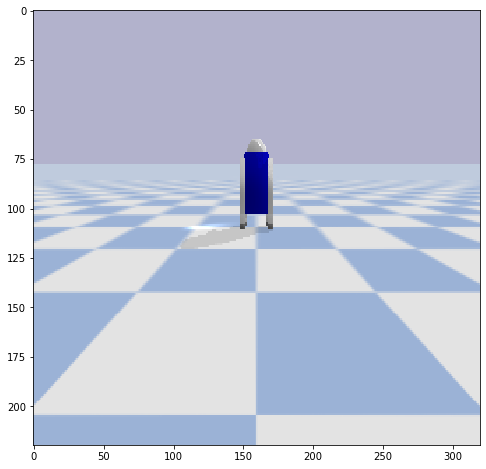

In [27]:
import pybullet as p
import pybullet_data
import pkgutil
import numpy as np
import time

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.animation as animation

# PyBullet setup.
egl = pkgutil.get_loader('eglRenderer')
physicsClient = p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #optionally
plugin = p.loadPlugin(egl.get_filename(), "_eglRendererPlugin")
p.setGravity(0,0,-10)

# Load models from pybullet_data.
planeId = p.loadURDF("plane.urdf")
startPos = [0,0,1]
startOrientation = p.getQuaternionFromEuler([0,0,0])
boxId = p.loadURDF("r2d2.urdf",startPos, startOrientation)

fps = 30
nSeconds = 5
nFrames = nSeconds * fps

# Image params.
pixelWidth = 320
pixelHeight = 220
camTargetPos = [0, 0, 0]
camDistance = 4
pitch = -10.0
roll = 0
yaw = 0.
upAxisIndex = 2
viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch, roll,
                                                 upAxisIndex)
projectionMatrix = [
    1.0825318098068237, 0.0, 0.0, 0.0, 0.0, 1.732050895690918, 0.0, 0.0, 0.0, 0.0,
    -1.0002000331878662, -1.0, 0.0, 0.0, -0.020002000033855438, 0.0
]

# matplotlib setup.
fig = plt.figure( figsize=(8,8) )
im = plt.imshow(np.random.rand(pixelHeight, pixelWidth), interpolation='none', aspect='auto', vmin=0, vmax=1)
renderings = []

for ii in range (nFrames):
    p.stepSimulation()
    time.sleep(1./fps)
    img_arr = p.getCameraImage(pixelWidth,
                           pixelHeight,
                           viewMatrix=viewMatrix,
                           projectionMatrix=projectionMatrix,
                           shadow=1,
                           lightDirection=[1, 1, 1])
    renderings.append(img_arr[2].reshape((h, w, 4)) * (1. / 255.))

def animate_func(ii):
    im.set_array(renderings[ii])
    return [im]

anim = animation.FuncAnimation(
                               fig,
                               animate_func,
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim.gif', fps=fps)

cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
print(cubePos,cubeOrn)

p.disconnect()
plt.show()